# Luxury Housing in King County

# ![example](images/AZ_Cadence_Montage_Savannah_Greatroom_1_1920.jpeg)

#### Author:
Pharoah Evelyn

# Overview

I use regression modeling to analyze house sales in King County, WA in order to build an appropriate luxury home for Bill Nye the Science Guy.

# Business Problem

# ![example](images/floor-plan-pen-ruler.jpeg)

Mr. Nye needs to know how the prices of homes can scale within King County.

We are building a new luxury home, however we do not have a specific budget in mind and need to create a home that would be competitive within the market for this county.

# Data Preparation

In [1]:
# Importing our modules & packages

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols 
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### Obtaining the data
Here, we obtain our dataset by importing it with Pandas

In [2]:
# Importing our data to read 

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Scrubbing and Cleaning Data
Now we can explore our dataset, gather its contents, and ensure that we can run models with it effectively.

In the cell below, we check each column's datatype.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Now we investigate some unique values inside the each column

In [4]:
# Discovering unique values in each columnn

uniques = {col: df[col].unique()[:5] for col in df.columns}
uniques

{'id': array([7129300520, 6414100192, 5631500400, 2487200875, 1954400510]),
 'date': array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014'],
       dtype=object),
 'price': array([221900., 538000., 180000., 604000., 510000.]),
 'bedrooms': array([3, 2, 4, 5, 1]),
 'bathrooms': array([1.  , 2.25, 3.  , 2.  , 4.5 ]),
 'sqft_living': array([1180, 2570,  770, 1960, 1680]),
 'sqft_lot': array([ 5650,  7242, 10000,  5000,  8080]),
 'floors': array([1. , 2. , 1.5, 3. , 2.5]),
 'waterfront': array([nan,  0.,  1.]),
 'view': array([ 0., nan,  3.,  4.,  2.]),
 'condition': array([3, 5, 4, 1, 2]),
 'grade': array([ 7,  6,  8, 11,  9]),
 'sqft_above': array([1180, 2170,  770, 1050, 1680]),
 'sqft_basement': array(['0.0', '400.0', '910.0', '1530.0', '?'], dtype=object),
 'yr_built': array([1955, 1951, 1933, 1965, 1987]),
 'yr_renovated': array([   0., 1991.,   nan, 2002., 2010.]),
 'zipcode': array([98178, 98125, 98028, 98136, 98074]),
 'lat': array([47.5112, 47.721 , 47.7379, 47.

In [5]:
# Removing placeholders in the basement column
df.sqft_basement = df.sqft_basement.map(lambda x: float(x.replace('?', 'nan')))

# dealing with null values
for col in df.columns:
    try:
        median = df[col].median()
        df[col] = df[col].fillna(value=median)
    except:
        continue

# Discovering unique values

uniques = {col: df[col].unique()[:5] for col in df.columns}
uniques

{'id': array([7129300520, 6414100192, 5631500400, 2487200875, 1954400510]),
 'date': array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014'],
       dtype=object),
 'price': array([221900., 538000., 180000., 604000., 510000.]),
 'bedrooms': array([3, 2, 4, 5, 1]),
 'bathrooms': array([1.  , 2.25, 3.  , 2.  , 4.5 ]),
 'sqft_living': array([1180, 2570,  770, 1960, 1680]),
 'sqft_lot': array([ 5650,  7242, 10000,  5000,  8080]),
 'floors': array([1. , 2. , 1.5, 3. , 2.5]),
 'waterfront': array([0., 1.]),
 'view': array([0., 3., 4., 2., 1.]),
 'condition': array([3, 5, 4, 1, 2]),
 'grade': array([ 7,  6,  8, 11,  9]),
 'sqft_above': array([1180, 2170,  770, 1050, 1680]),
 'sqft_basement': array([   0.,  400.,  910., 1530.,  730.]),
 'yr_built': array([1955, 1951, 1933, 1965, 1987]),
 'yr_renovated': array([   0., 1991., 2002., 2010., 1992.]),
 'zipcode': array([98178, 98125, 98028, 98136, 98074]),
 'lat': array([47.5112, 47.721 , 47.7379, 47.5208, 47.6168]),
 'long': array

In [6]:
# subsetting relevant columns
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
       'floors', 'waterfront', 'condition', 'grade', 'yr_built']]

# creating dummy variables and cleaning up new variable names for statsmodels
df = pd.get_dummies(df, drop_first=True)

subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


# Exploratory Data Analysis with Regressions

#### With our data cleaned, we can move on to checking linear relationships, and multicolinear relationships.

With linearity, we check dor correlation between our target (price), and our continuous features

With multicollinearity, we're able to see which variabble that are correlated amongst eachother. 
We can then eliminate these from oue trsting to reduce redundancy.


First, we will look at our data's linearity.
Here, we chose a `regplot` to display the data, because it helps show the actual relationship between two variables

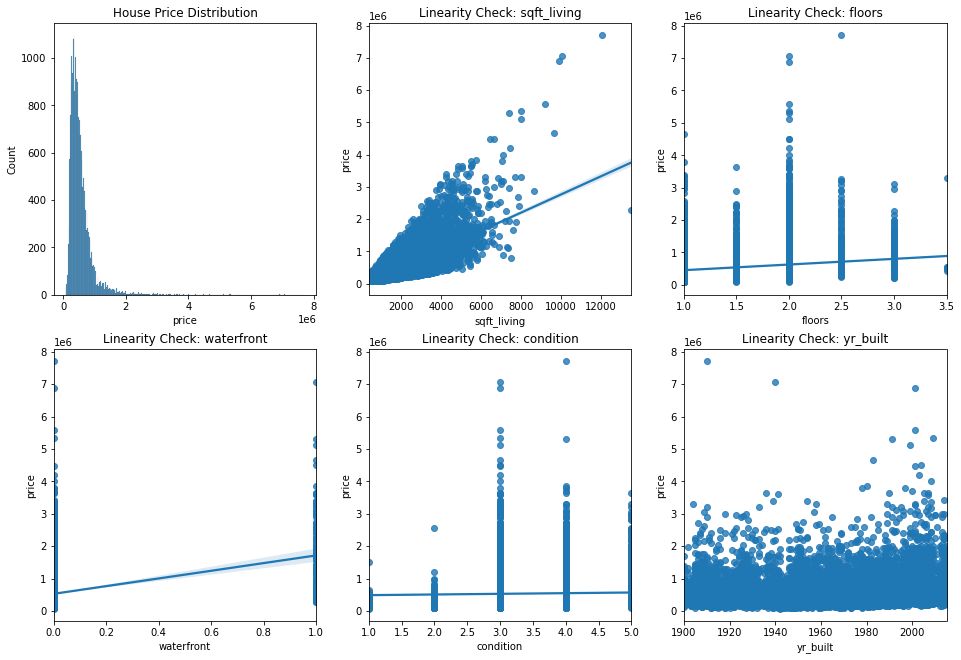

In [7]:
cont = ['sqft_living', 'floors', 'waterfront', 'condition', 'yr_built']

fig, axes = plt.subplots(2, 3, figsize=(16, 11))

sns.histplot(df['price'], ax=axes[0][0]).set_title('House Price Distribution')

# Creating our plots to check for linearity
for feat, ax in zip(cont, axes.flatten()[1:]):
    sns.regplot(feat,'price', data=df, ax=ax).set_title(f'Linearity Check: {feat}')

fig.show()

# plt.savefig('images/Data_Linearity_Regplots.png', dpi=300, bbox_inches='tight', transparent=False)

#### Interpretation
* `price` has outliers on the higher end
* `grade`, `sqft_living`, & `floors` have positive correlation with our target
* `zipcode` & `condition` appear neutral


In [8]:
# Find z-score of price column
z = np.abs(stats.zscore(df['price']))
print(z)

0        0.866716
1        0.006252
2        0.980773
3        0.173409
4        0.082471
           ...   
21592    0.490790
21593    0.381905
21594    0.376186
21595    0.381905
21596    0.586065
Name: price, Length: 21597, dtype: float64


#### Next, we will look at the multicollinear relationships in the data, with a heatmap for visibility!

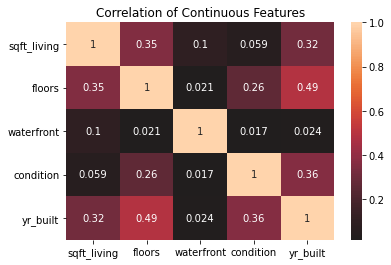

In [9]:
corr = df[cont].corr().abs()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous Features');

plt.savefig('images/Correlation_of_Continuous_Features_Heatmap_1.png', dpi=300, 
            bbox_inches='tight', transparent=False)

#### Interpretation
* Notable multicollinearity between `floors` & `yr_built`
* Decent-to-low multicollinearity among most other features
* Moderately low multicollinearity between `floors` & `condition`, and `yr_built` & `condition`
* Probably isn't worth dropping `floors` & `condition` since values arent above 0.75

Next, lets take a look at multicollinearity using Variance Inflation Factor

Anything with a score higher than 5 suggests that there is multicollinearity.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const          8538.751151
price             2.822027
bedrooms          1.661398
bathrooms         3.218808
sqft_living       4.705793
sqft_lot          1.049579
floors            1.576529
waterfront        1.101937
condition         1.186038
grade             3.375056
yr_built          2.001445
dtype: float64

# Modeling Our Data

We will now use a 'Train, Split Test' to see how good our models can predict future data

In [11]:
train, test = train_test_split(df)
train.shape

(16197, 10)

In [12]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3574,405000.0,3,1.5,1880,7400,1.0,0.0,3,8,1968
9272,406000.0,3,1.0,1090,11292,1.0,0.0,4,7,1952
12012,589000.0,3,1.0,1110,6000,1.5,0.0,5,7,1932
5636,212000.0,3,1.5,1060,9225,1.0,0.0,4,7,1955
17128,1300000.0,4,3.5,2790,10125,1.5,0.0,5,8,1985


#### Creating a function for modeling

In [13]:
# If you are transforming your target variable (likely log-transform)
# don't forget to un-transform before calculating RMSE
# Perhaps incorporate into your function!
# i.e. mean_squared_error(np.exp(y_train), np.exp(y_hat_train))

def olsmodel(train, test):
    target = 'price'
    x_cols = list(train.columns)
    x_cols.remove('price')
    
    predictors = '+'.join(x_cols)
    formula = target + '~' + predictors
    model = ols(formula=formula, data=train).fit()

    # MAE
    train_err = (mean_absolute_error(train['price'], model.predict(train)))**0.5
    test_err = (mean_absolute_error(test['price'], model.predict(test)))**0.5

    print("Train MAE: ", train_err)
    print("Test MAE: ", test_err, '\n')

    return model

In [14]:
olsmodel(train, test).summary()

Train MAE:  378.06097300228606
Test MAE:  374.25138967053283 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3221.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:52:28   Log-Likelihood:            -2.2215e+05
No. Observations:               16197   AIC:                         4.443e+05
Df Residuals:                   16187   BIC:                         4.444e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.693e+06    1.5e+05     44.488      0.000     6.4e+06    6.99e+06
bedrooms    -4.099e+04   2347.101    -17.462      0.000   -4.56e+04   -3.64e+04
bathrooms    5.423e+04   3999.948     13.557      0.000    4.64e+04    6.21e+04
sqft_living   176.2206      3.854     45.728      0.000     168.667     183.774
sqft_lot       -0.2331      0.043     -5.446      0.000      -0.317      -0.149
floors       1.797e+04   4007.816      4.484      0.000    1.01e+04    2.58e+04
waterfront   6.923e+05   2.11e+04     32.837      0.000    6.51e+05    7.34e+05
condition    1.862e+04   2875.987      6.474      0.000     1.3e+04    2.43e+04
grade          1.3e+05   2487.378     52.275      0.000    1.25e+05    1.35e+05
yr_built    -3847.0662     77.414    -49.695      0.000   -3998.805   -3695.327
==============================================================================
Omnibus:                    11760.308   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           678681.881
Skew:                           2.916   Prob(JB):                         0.00
Kurtosis:                      34.171   Cond. No.                     3.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Coefficient Analysis
* Having a waterfront affects the price of a home by adding $781,200

#### Interpretation
* Our $R^{2}$ explains 65% of the data. A slight majority
* We have 0 high p-values
* Errors in our data might be \\$ 375.83 for Training data, and \\$ 378.03 for Testing data

We do not need to cull our data further because all p-values are under 0.05

In [15]:
model1 = olsmodel(train, test)

Train MAE:  378.06097300228606
Test MAE:  374.25138967053283 



### Post-Modeling Assumption Check
Next, we want to look at the normality and homoscedasticity of residuals.

We will check these features using a Histogram and QQ-plot

#### Creating a function to check for normality

In [16]:
# Defining a function for checking normality

def normality(model):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax0.hist(model.resid)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')
    
    sm.qqplot(model.resid, stats.t, fit=True, line="45", ax=ax1)
    ax1.set(title='QQ Plot')
    
    fig.show

Model 1 Normality of Residuals


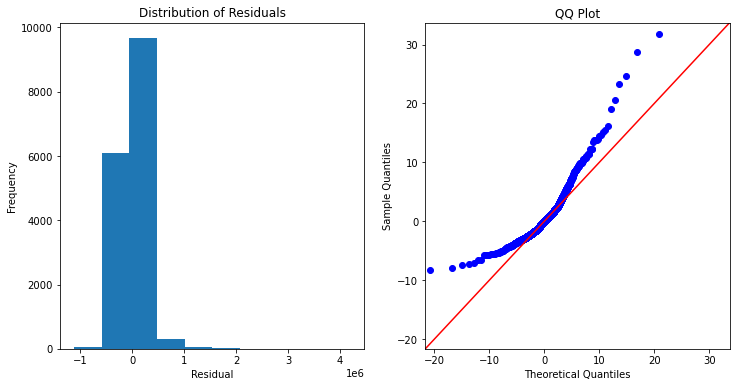

In [17]:
print('Model 1 Normality of Residuals')
normality(model1)
# plt.savefig('images/Model_1_Assumption_Check.png', dpi=300, bbox_inches='tight', transparent=False)

#### Interpretation: 
* Our histogram shows the data is mostly centered around 0
* Our QQ-plot shows a light-tailed normal relationship, but it also violates the normality assumption

#### Creating a function to check for homoscedasticity

In [18]:
# Defining Function for our Homoscedasticity Plots

def hmscd(train, test, model):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    left_ax, right_ax = axes

    left_ax.scatter(train['price'], model.resid, alpha=0.3)
    left_ax.scatter(test['price'], (test['price']-model.predict(test)), color='orange', alpha=0.3)
    left_ax.set(xlabel='Actual House Price', ylabel='Residual', title='Residual per House Price')
    left_ax.hlines(0, xmin=0, xmax=train['price'].max(), colors='red')
    left_ax.autoscale(enable=True, axis='both', tight=None)

    right_ax.scatter(train['price'], model.predict(train), alpha=0.3)
    right_ax.scatter(test['price'], model.predict(test), color='orange', alpha=0.3)
    right_ax.plot([0, train['price'].max()], [0, train['price'].max()], color='red', linestyle='-', linewidth=2)
    right_ax.set(xlabel='Actual House Price', ylabel='Predicted House Price', title='Actual vs Predicted House Price')

    fig.show()

Model 1 Residual Plots


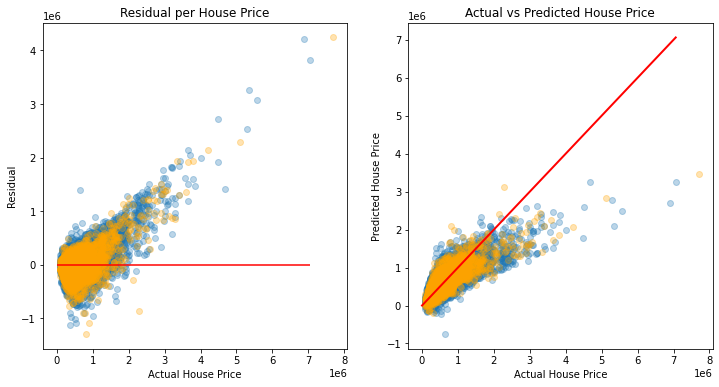

In [19]:
print('Model 1 Residual Plots')
hmscd(train, test, model1)
# plt.savefig('images/Model_1_Residual_Plots.png', dpi=300, bbox_inches='tight', transparent=False)

* Orange dots are testing data
* Blue dots are training data

#### Interpretation
This data is not homoscedastic

`Residual per House Price` plot:
* Majority of the outliers are predicted too low, based on our data
* Data that is predicted too high does not have that mant outliers
* Model does not have consistent performance above the $2 Million in price range

Data does not appear to be consistent

We can use this model to predict housing that is under $2.2 Million

# Model Refinement (Scaled Model  #1)
### Standardizing our features
Since we have errors in our model, we should scale our data to improve the performance of our model

#### What are the most impactful attributes towards price in this dataset?

In [20]:
X_train = train.drop('price', axis=1)
X_test = test.drop('price', axis=1)

standardizer = StandardScaler()

train_scaled = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
test_scaled = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)

train_scaled['price'] = train.price.values
test_scaled['price'] = test.price.values

In [21]:
scaled_model1 = olsmodel(train_scaled, test_scaled)
scaled_model1.summary()

Train MAE:  378.0609730022953
Test MAE:  374.2513896705477 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3221.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:52:29   Log-Likelihood:            -2.2215e+05
No. Observations:               16197   AIC:                         4.443e+05
Df Residuals:                   16187   BIC:                         4.444e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.406e+05   1721.277    314.092      0.000    5.37e+05    5.44e+05
bedrooms    -3.817e+04   2186.100    -17.462      0.000   -4.25e+04   -3.39e+04
bathrooms    4.149e+04   3060.107     13.557      0.000    3.55e+04    4.75e+04
sqft_living  1.601e+05   3500.438     45.728      0.000    1.53e+05    1.67e+05
sqft_lot    -9563.3403   1756.012     -5.446      0.000    -1.3e+04   -6121.363
floors       9682.4845   2159.571      4.484      0.000    5449.486    1.39e+04
waterfront   5.712e+04   1739.388     32.837      0.000    5.37e+04    6.05e+04
condition     1.21e+04   1869.534      6.474      0.000    8439.128    1.58e+04
grade        1.531e+05   2929.077     52.275      0.000    1.47e+05    1.59e+05
yr_built    -1.129e+05   2271.988    -49.695      0.000   -1.17e+05   -1.08e+05
==============================================================================
Omnibus:                    11760.308   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           678681.881
Skew:                           2.916   Prob(JB):                         0.00
Kurtosis:                      34.171   Cond. No.                         4.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficient Analysis:
* Features that most positively impact price: `grade` & `sqft_living`
* Features that negatively impact price: `bedrooms` & `yr_built`

### Post-Modeling Assumption Check

Scaled Model 1 Normality of Residuals


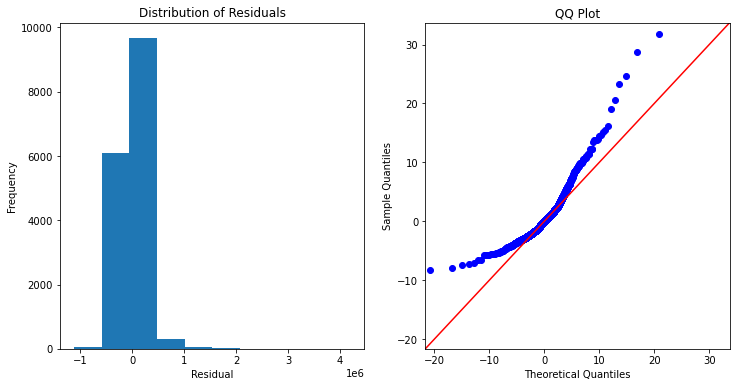

In [22]:
print('Scaled Model 1 Normality of Residuals')
normality(scaled_model1)

#### Interpretation: 
* Our charts here appear to have no changes when compared to Model 1

#### Check for Homoscedasticity

Scaled Model 1 Residual Plots


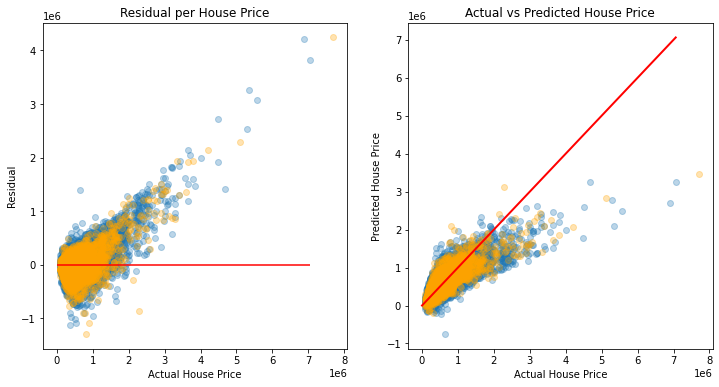

In [23]:
print('Scaled Model 1 Residual Plots')
hmscd(train_scaled, test_scaled, scaled_model1)
# plt.savefig('images/Scaled_Model_Residual_Plots.png', dpi=300, bbox_inches='tight', transparent=False)

#### Interpretation
* Our data is still very much heteroscedastic
* It seems even with scaled data, our model is not very reliable above around $1.5 Million
* Our dataset has a lot of outliers that skew the data

# Model Refinement 2 (Model # 2)
### Removing Outliers
Based on our findings in the previous outliers, we have plenty of outliers that may be skewing our findings in the original model

In [24]:
def find_outliers(t):
    for i in range(90, 99):
        q = i / 100
        print('{} percentile: {}'.format(q, t['price'].quantile(q=q)))
    t.price.hist()

0.9 percentile: 890399.9999999997
0.91 percentile: 920000.0
0.92 percentile: 955160.0000000008
0.93 percentile: 999000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1400000.0
0.98 percentile: 1610000.0


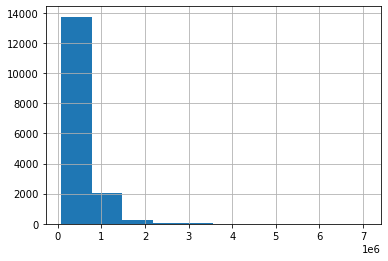

In [25]:
find_outliers(train)

0.9 percentile: 875000.0
0.91 percentile: 900000.0
0.92 percentile: 940119.9999999999
0.93 percentile: 990000.0
0.94 percentile: 1050000.0
0.95 percentile: 1150000.0
0.96 percentile: 1250000.0
0.97 percentile: 1360000.0
0.98 percentile: 1580199.9999999953


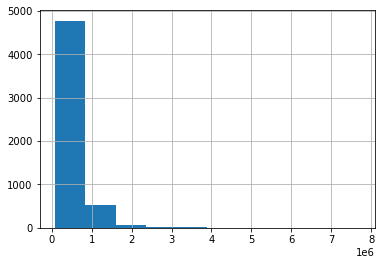

In [26]:
find_outliers(test)

In [27]:
subset_train = train[train['price'] < 1160000.1]
subset_test = test[test['price'] < 1160000.1]

Above, I chose $1.16 Million as cutoff for both training & testing data, because data above that range would be around or over 3 standard deviations from the mean for price data in the `train` & `test` datasets 

In [28]:
print('Percent removed:',abs((len(subset_train) - len(train))/len(subset_train)))
model2 = olsmodel(subset_train, subset_test) 
model2.summary()

Percent removed: 0.052094835985709645
Train MAE:  329.0590667255478
Test MAE:  326.0095181539836 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2235.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:52:31   Log-Likelihood:            -2.0425e+05
No. Observations:               15395   AIC:                         4.085e+05
Df Residuals:                   15385   BIC:                         4.086e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.886e+06   1.01e+05     48.303      0.000    4.69e+06    5.08e+06
bedrooms    -1.537e+04   1565.603     -9.817      0.000   -1.84e+04   -1.23e+04
bathrooms    3.273e+04   2686.512     12.185      0.000    2.75e+04     3.8e+04
sqft_living    90.1420      2.698     33.408      0.000      84.853      95.431
sqft_lot        0.0392      0.029      1.367      0.172      -0.017       0.095
floors       3.654e+04   2658.729     13.745      0.000    3.13e+04    4.18e+04
waterfront   1.862e+05   2.01e+04      9.281      0.000    1.47e+05    2.26e+05
condition    1.756e+04   1888.849      9.297      0.000    1.39e+04    2.13e+04
grade        1.035e+05   1691.818     61.201      0.000       1e+05    1.07e+05
yr_built    -2788.8431     52.359    -53.264      0.000   -2891.472   -2686.214
==============================================================================
Omnibus:                      813.646   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1198.057
Skew:                           0.473   Prob(JB):                    7.00e-261
Kurtosis:                       3.985   Cond. No.                     3.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretation
* Our $R^{2}$ has reduced, & only explains roughly 57% of the data
* `sqft_lot` now has a high p-value
* Errors in our data have reduced to \\$ 328.10 for Training data, and \\$ 329.14 for Testing data 

#### Removing Insignificant Variables

In [29]:
model2s = olsmodel(subset_train, subset_test).summary()

p_table = model2s.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
sig = list(p_table[p_table['P>|t|'] < 0.05].index)
sig.remove('Intercept')
print("Total # features: ", len(p_table))
print("Total significant features", len(sig))
p_table.head()

Train MAE:  329.0590667255478
Test MAE:  326.0095181539836 

Total # features:  10
Total significant features 8


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.886e+06,1.01e+05,48.303,0.000,4.69e+06,5.08e+06
bedrooms,-1.537e+04,1565.603,-9.817,0.000,-1.84e+04,-1.23e+04
bathrooms,3.273e+04,2686.512,12.185,0.000,2.75e+04,3.8e+04
sqft_living,90.1420,2.698,33.408,0.000,84.853,95.431
sqft_lot,0.0392,0.029,1.367,0.172,-0.017,0.095


In [30]:
# Mapping the new data to our second model

subset_train_1, subset_test_1 = subset_train[sig+['price']], subset_test[sig+['price']]

In [31]:
model2_1 = olsmodel(subset_train_1, subset_test_1)
model2_1.summary()

Train MAE:  329.0805034180237
Test MAE:  325.9466301789247 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2514.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:52:31   Log-Likelihood:            -2.0425e+05
No. Observations:               15395   AIC:                         4.085e+05
Df Residuals:                   15386   BIC:                         4.086e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.882e+06   1.01e+05     48.283      0.000    4.68e+06    5.08e+06
bedrooms    -1.553e+04   1561.116     -9.949      0.000   -1.86e+04   -1.25e+04
bathrooms    3.261e+04   2685.038     12.145      0.000    2.73e+04    3.79e+04
sqft_living    90.7153      2.665     34.033      0.000      85.491      95.940
floors       3.631e+04   2653.143     13.685      0.000    3.11e+04    4.15e+04
waterfront   1.869e+05   2.01e+04      9.319      0.000    1.48e+05    2.26e+05
condition    1.757e+04   1888.879      9.304      0.000    1.39e+04    2.13e+04
grade        1.035e+05   1691.491     61.184      0.000       1e+05    1.07e+05
yr_built    -2786.2953     52.327    -53.248      0.000   -2888.862   -2683.728
==============================================================================
Omnibus:                      813.755   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1197.862
Skew:                           0.474   Prob(JB):                    7.72e-261
Kurtosis:                       3.985   Cond. No.                     2.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretation
* Our $R^{2}$ has slightly increased, & explains roughly 57% of the data
* We now have no high p-values again
* Errors in our data have reduced to \\$ 328.11 for Training data, and \\$ 329.10 for Testing data 

### Post-Modeling Assumption Check

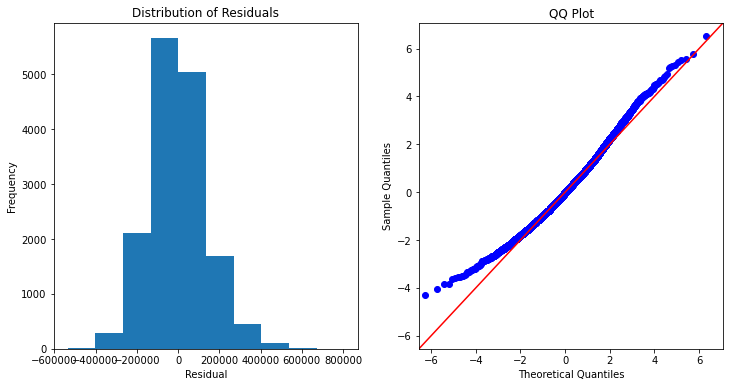

In [32]:
normality(model2_1)
# plt.savefig('images/Model_2_Assumption_Check.png', dpi=300, bbox_inches='tight', transparent=False)

#### Interpretation: 
* Our data now fits the normality assumption much better, and appears much more normally distributed on the histogram

#### Check for Homoscedasticity

Model 2 Residual Plots


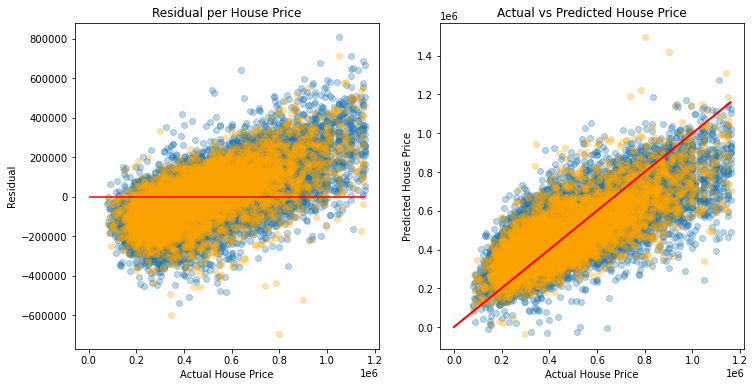

In [33]:
print('Model 2 Residual Plots')
hmscd(subset_train_1, subset_test_1, model2_1)

#### Interpretation
* Our data appears much less heteroscedastic at first glance, though heavily skewed in terms of uniformity on our prediction line
* Our updated second model appears to predict our data in the lower price ranges too low, and the data in the higher ranges too high

# Model Refinement 3 (Model # 3)
### Repeating the steps taken for Model 2

#### Removing Outliers

0.9 percentile: 790000.0
0.91 percentile: 808000.0
0.92 percentile: 825000.0
0.93 percentile: 850000.0
0.94 percentile: 870000.0
0.95 percentile: 900000.0
0.96 percentile: 926348.0
0.97 percentile: 965000.0
0.98 percentile: 1000000.0


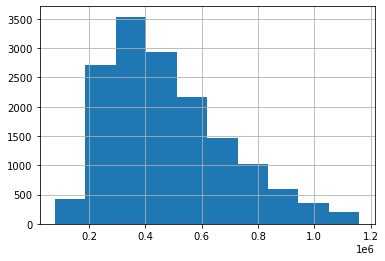

In [34]:
find_outliers(subset_train_1)

0.9 percentile: 790000.0
0.91 percentile: 808000.0
0.92 percentile: 825000.0
0.93 percentile: 850000.0
0.94 percentile: 870000.0
0.95 percentile: 900000.0
0.96 percentile: 926348.0
0.97 percentile: 965000.0
0.98 percentile: 1000000.0


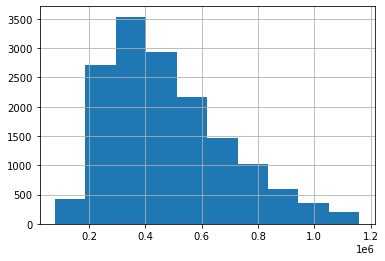

In [35]:
find_outliers(subset_train_1)

In [36]:
subset_train2 = subset_train_1[subset_train['price'] < 895000.1]
subset_test2 = subset_train_1[subset_train['price'] < 900000.1]

Above, I chose $1.16 Million as cutoff for both training & testing data, because data above that range would be around or over 3 standard deviations from the mean for price data in the `subset_train` & `subset_test` datasets

In [37]:
print('Percent removed:',abs((len(subset_train2) - len(subset_train))/len(subset_train2)))
model3 = olsmodel(subset_train2, subset_test2) 
model3.summary()

Percent removed: 0.05488556941208716
Train MAE:  317.16313637954505
Test MAE:  318.00171358472676 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1829.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:52:32   Log-Likelihood:            -1.9210e+05
No. Observations:               14594   AIC:                         3.842e+05
Df Residuals:                   14585   BIC:                         3.843e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.312e+06   9.54e+04     45.184      0.000    4.12e+06     4.5e+06
bedrooms    -1.371e+04   1454.442     -9.424      0.000   -1.66e+04   -1.09e+04
bathrooms    2.939e+04   2523.825     11.646      0.000    2.44e+04    3.43e+04
sqft_living    76.9133      2.553     30.127      0.000      71.909      81.917
floors       3.627e+04   2461.910     14.733      0.000    3.14e+04    4.11e+04
waterfront    1.37e+05   2.11e+04      6.504      0.000    9.57e+04    1.78e+05
condition    1.503e+04   1749.024      8.596      0.000    1.16e+04    1.85e+04
grade        9.066e+04   1617.642     56.047      0.000    8.75e+04    9.38e+04
yr_built    -2436.5545     49.595    -49.129      0.000   -2533.768   -2339.341
==============================================================================
Omnibus:                      198.401   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.633
Skew:                           0.275   Prob(JB):                     4.96e-46
Kurtosis:                       3.200   Cond. No.                     2.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretation
* Our $R^{2}$ now only explains 51.1% of the data
* We have no high p-values. There are no insignificant values to remove
* Errors in our data have reduced to \\$ 316.60 for Training data, and \\$ 317.37 for Testing data 

### Post-Modeling Assumption Check

Model 3 Normality of Residuals


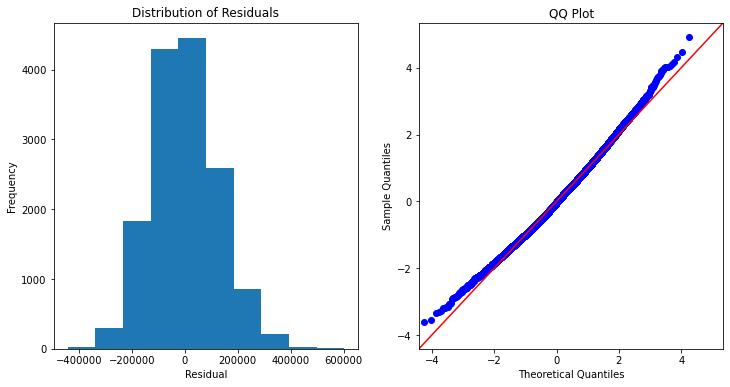

In [38]:
print('Model 3 Normality of Residuals')
normality(model3)
# plt.savefig('images/Model_3_Assumption_Check.png', dpi=300, bbox_inches='tight', transparent=False)

#### Interpretation: 
* Our data now has further improvements on the QQ-plot & Histogram!

#### Check for Homoscedasticity

Model 3 Residual Plots


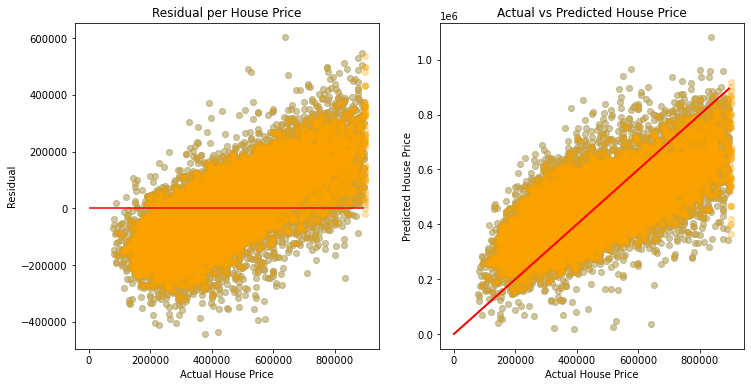

In [39]:
print('Model 3 Residual Plots')
hmscd(subset_train2, subset_test2, model3)
# plt.savefig('images/Model_3_Residual_Plots.png', dpi=300, bbox_inches='tight', transparent=False)

* Orange dots are testing data
* Blue dots are training data

#### Interpretation
* Our data appears more uniformed when compared to our Model 2 results
* The Testing data is spot on when matching the training data, for our predictions
* Data is still not perfectly in line with our prediction line
* Our updated second model appears to predict our data in the lower price ranges too low, and the data in the higher ranges too high

# Model Refinement 2 (Scaled Model #3)

### Standardizing our features
Since we have a final model, we should scale our data to how features weigh against eachother

#### What are the most impactful attributes towards price in this dataset?

In [40]:
X_train = subset_train2.drop('price', axis=1)
X_test = subset_test2.drop('price', axis=1)

standardizer = StandardScaler()

train_scaled_2 = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
test_scaled_2 = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)

train_scaled_2['price'] = subset_train2.price.values
test_scaled_2['price'] = subset_test2.price.values

In [41]:
scaled_model3 = olsmodel(train_scaled_2, test_scaled_2)
scaled_model3.summary()

Train MAE:  317.1631363795439
Test MAE:  318.0017135847255 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1829.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:52:33   Log-Likelihood:            -1.9210e+05
No. Observations:               14594   AIC:                         3.842e+05
Df Residuals:                   14585   BIC:                         3.843e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.517e+05   1043.008    433.047      0.000     4.5e+05    4.54e+05
bedrooms    -1.245e+04   1320.678     -9.424      0.000    -1.5e+04   -9857.347
bathrooms    2.013e+04   1728.303     11.646      0.000    1.67e+04    2.35e+04
sqft_living  5.508e+04   1828.209     30.127      0.000    5.15e+04    5.87e+04
floors       1.938e+04   1315.195     14.733      0.000    1.68e+04     2.2e+04
waterfront   6794.8738   1044.727      6.504      0.000    4747.076    8842.671
condition    9705.3838   1129.054      8.596      0.000    7492.295    1.19e+04
grade        8.797e+04   1569.601     56.047      0.000    8.49e+04     9.1e+04
yr_built    -7.063e+04   1437.753    -49.129      0.000   -7.35e+04   -6.78e+04
==============================================================================
Omnibus:                      198.401   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.633
Skew:                           0.275   Prob(JB):                     4.96e-46
Kurtosis:                       3.200   Cond. No.                         4.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficient Analysis:
* Features that most positively impact price: `grade` & `sqft_living`
* Features that negatively impact price: `bedrooms` & `yr_built`

#### Most impactful data in order of absolute value:
* `grade`, `yr_built`, `sqft_living`, `bathrooms`, `floors`, `bedrooms`, `condition`, `waterfront` 

### Post-Modeling Assumption Check

Scaled Model 3 Normality of Residuals


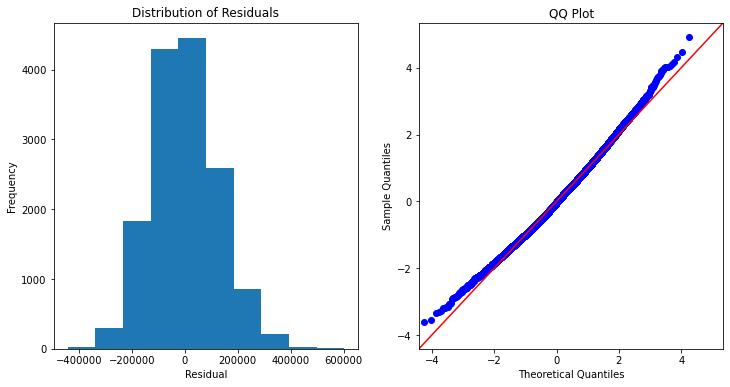

In [42]:
print('Scaled Model 3 Normality of Residuals')
normality(scaled_model3)

Scaled Model 3 Residual Plots


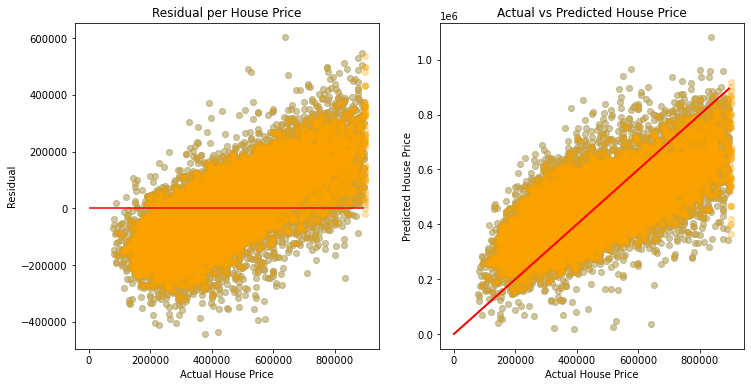

In [43]:
print('Scaled Model 3 Residual Plots')
hmscd(train_scaled_2, test_scaled_2, scaled_model3)

# Conclusions

According to our Scaled Model 3:
* The grade of a house given by Kings County, and its size in Square Feet have the most positive impact on house price
* At the same time: The amount of bedrooms & the year a house was built have the most negative impact on house price

### In terms of all our models:
* Predicting house prices can be pretty challenging because it depends on a multitude of factors
* The Kings County dataset has a lot of outliers that was skewing our models outputs
* Our final model is best to be used for homes that are up to $900K in price, since it violates our assumptions to the least degree
* Our final model accurately predicts the test data with the training data, save for a few outliers here and there

From here, we can use our final model to finally come up with actual blueprints for the perfect home

# Recommendations

* Build a house that maximizes square footage & keeps the bedroom count low
  * Have large bedrooms rather than a high number of bedrooms 
* Inspect the grading standards of King County, to ensure that this house will receive a good grade. Which will in turn increase its value
* Build a house that is under $900K in price, since our model is unreliable above that price range

#### Actionables:
* Prioritize adding more square feet to the the home. Having more square feet adds value. to the home
* Prioritize owning a newer home, even. if you resort to buying. Because the older a home is, the more its value decreases

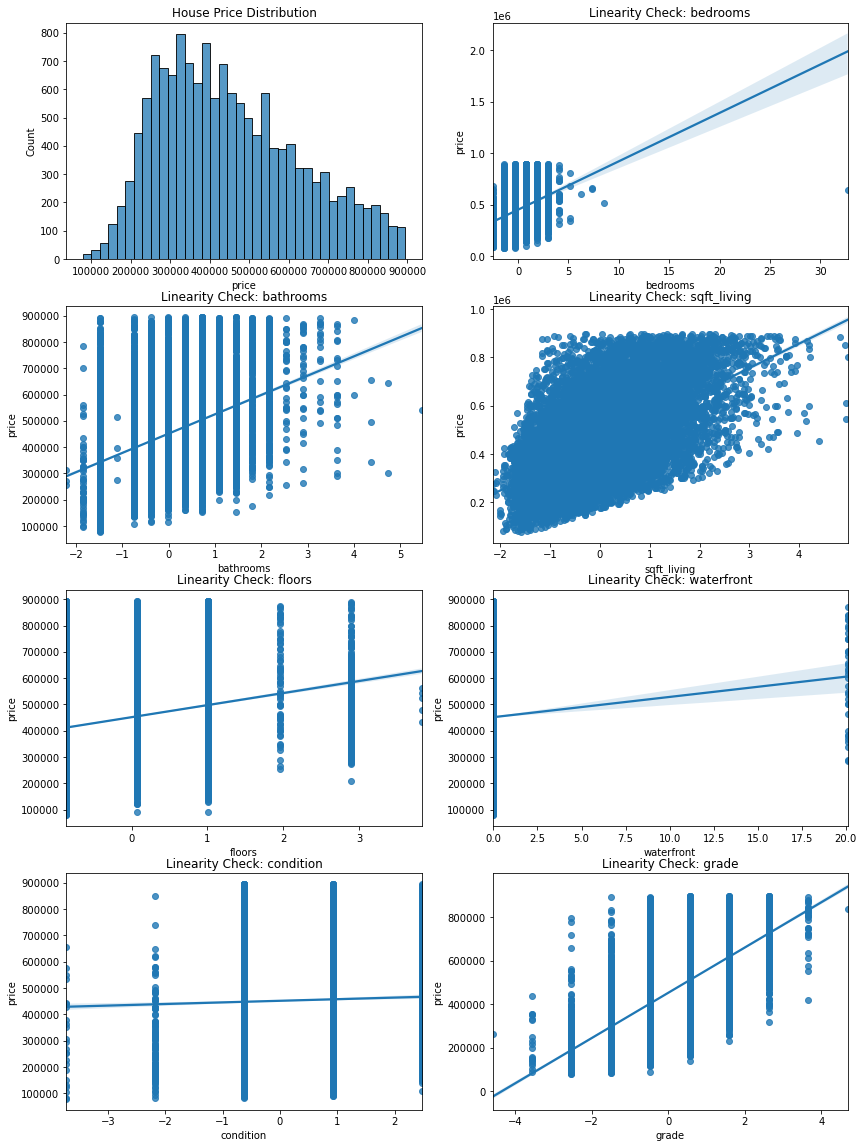

In [46]:
fig, axes = plt.subplots(4, 2, figsize=(14, 20))

sns.histplot(train_scaled_2['price'], ax=axes[0][0]).set_title('House Price Distribution')

# Creating our plots to check for linearity
for feat, ax in zip(train_scaled_2.columns, axes.flatten()[1:]):
    sns.regplot(feat,'price', data=train_scaled_2, ax=ax).set_title(f'Linearity Check: {feat}')

fig.show()

# plt.savefig('images/Data_Linearity_Regplots_2.png', dpi=300, bbox_inches='tight', transparent=False)

# Next Steps
* Look into cost effective ways to build a home for the best deal
* Contact King County for guidelines on highly graded homes
